In [2]:
%pylab inline
import pandas 
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [3]:
data=pandas.read_csv('uber_raw_data.csv')

In [4]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [5]:
dt='4/1/2014 0:11:00'
dt=pandas.to_datetime(dt)

In [6]:
dt.weekofyear


14

the code below will do the conversion on the entire df.

In [7]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)

In [8]:
def get_dom(dt):
    return dt.day

data['dom']=data['Date/Time'].map(get_dom)

In [9]:
data.tail()

,Date/Time,Lat,Lon,Base,dom
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


In [10]:
def get_weekday(dt):
    return dt.weekday()
data['weekday']=data['Date/Time'].map(get_weekday)

def get_hour(dt):
     return dt.hour
data['hour']=data['Date/Time'].map(get_hour)
    

In [11]:
data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


In [12]:
data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


(array([52721., 59680., 52581., 58631., 45427., 56764., 38781., 60673.,
        64697., 74561.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <a list of 10 Patch objects>)

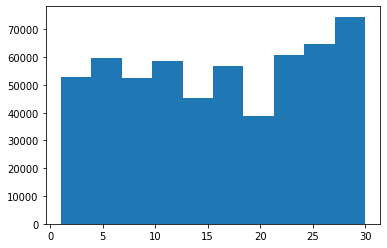

In [13]:
hist(data.dom)

Text(0.5, 1.0, 'frequency by dom-uber')

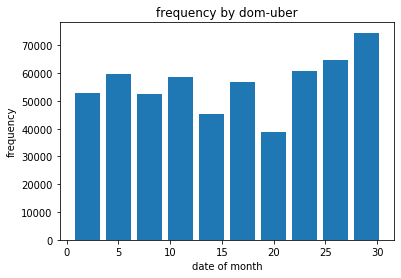

In [14]:
hist(data.dom,bins=10,rwidth=0.8,range=(0.5,30.5))
xlabel('date of month')
ylabel('frequency')
title('frequency by dom-uber')

In [15]:
for k,rows in data.groupby('dom'):
    print ((k,len(rows)))


(1, 14546)
(2, 17474)
(3, 20701)
(4, 26714)
(5, 19521)
(6, 13445)
(7, 19550)
(8, 16188)
(9, 16843)
(10, 20041)
(11, 20420)
(12, 18170)
(13, 12112)
(14, 12674)
(15, 20641)
(16, 17717)
(17, 20973)
(18, 18074)
(19, 14602)
(20, 11017)
(21, 13162)
(22, 16975)
(23, 20346)
(24, 23352)
(25, 25095)
(26, 24925)
(27, 14677)
(28, 15475)
(29, 22835)
(30, 36251)


In [16]:
def count_rows(rows):
    return len(rows)
#Pandas.apply allow the users to pass a function and apply it on every single value of the Pandas series.
by_date=data.groupby('dom').apply(count_rows)
by_date
 

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

<BarContainer object of 30 artists>

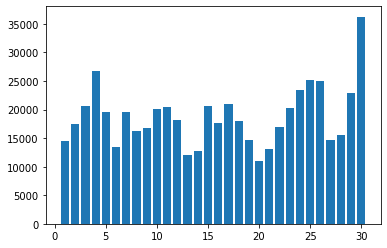

In [17]:
bar(range(1,31),by_date)

In [18]:
by_date_sorted=by_date.sort_values()
by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

<BarContainer object of 30 artists>

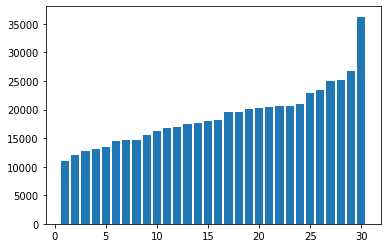

In [19]:
bar(range(1,31),by_date_sorted)

([<matplotlib.axis.XTick at 0x7fe2cf201590>,
 <a list of 30 Text xticklabel objects>)

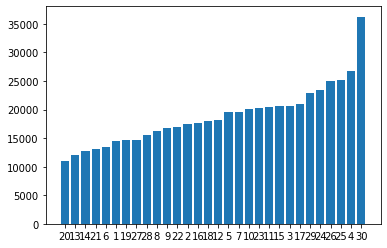

In [20]:
bar(range(1,31),by_date_sorted)
xticks(range(1,31),by_date_sorted.index)

Text(0, 0.5, 'Frequency')

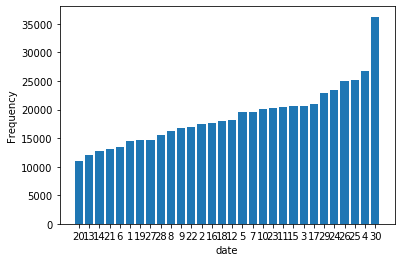

In [21]:
bar(range(1,31),by_date_sorted)
xticks(range(1,31),by_date_sorted.index)
;
xlabel('date')
ylabel('Frequency')


## analysis hour

(array([ 7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924., 22843.,
        17939., 17865., 18774., 19425., 22603., 27190., 35324., 42003.,
        45475., 43003., 38923., 36244., 36964., 30645., 20649.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <a list of 24 Patch objects>)

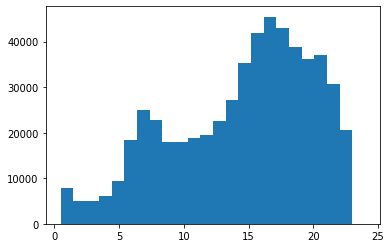

In [22]:
hist(data.hour,bins=24,range=(0.5,24))

## analyze the weekday

([<matplotlib.axis.XTick at 0x7fe2ca0e5f50>,
 <a list of 7 Text xticklabel objects>)

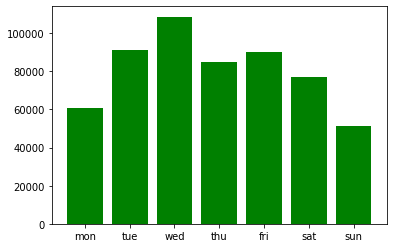

In [27]:
hist(data.weekday,bins=7,range=(-0.5,6.5),color='green',rwidth=0.8)
xticks(range(7),'mon tue wed thu fri sat sun'.split())

In [24]:
data.groupby('hour weekday'.split()).apply(count_rows)

hour  weekday
0     0           518
      1           765
      2           899
      3           792
      4          1367
                 ... 
23    2          2571
      3          2909
      4          5393
      5          5719
      6          1018
Length: 168, dtype: int64

In [25]:
data.groupby('hour weekday'.split()).apply(count_rows).unstack()

weekday,0,1,2,3,4,5,6
hour,,,,,,,
0,518,765,899,792,1367,3027,4542
1,261,367,507,459,760,2479,2936
2,238,304,371,342,513,1577,1590
3,571,516,585,567,736,1013,1052
4,1021,887,1003,861,932,706,685
5,1619,1734,1990,1454,1382,704,593
6,2974,3766,4230,3179,2836,844,669
7,3888,5304,5647,4159,3943,1110,873
8,3138,4594,5242,3616,3648,1372,1233


In [29]:
by_cross=data.groupby('weekday hour'.split()).apply(count_rows).unstack()

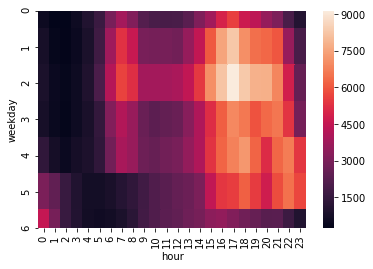

In [30]:
seaborn.heatmap(by_cross)

''

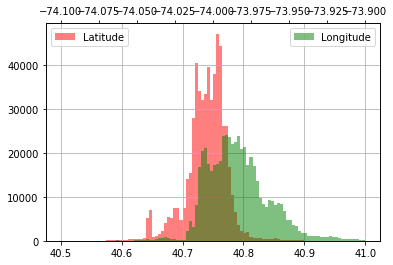

In [53]:
hist(data['Lat'],bins=100,range=(40.5,41),color='r',alpha=0.5,label='Latitude')
grid()
legend(loc='upper left')
twiny()
hist(data['Lon'],bins=100,range=(-74.1,-73.9),color='g',alpha=0.5,label='Longitude')

legend(loc='best')
;

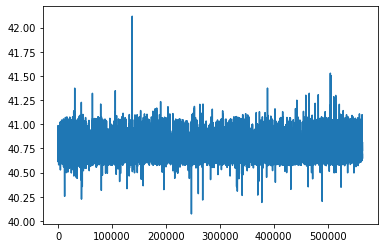

In [54]:
plot(data['Lat'])

(0, 100)

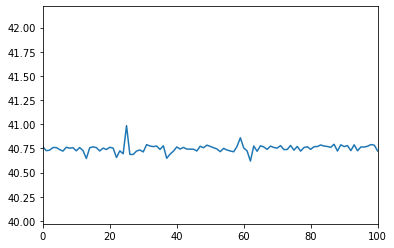

In [55]:
plot(data['Lat'])
xlim(0,100)

(0, 100)

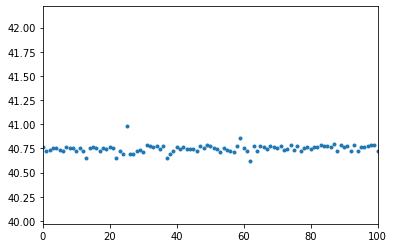

In [56]:
plot(data['Lat'],'.')
xlim(0,100)

(0, 100)

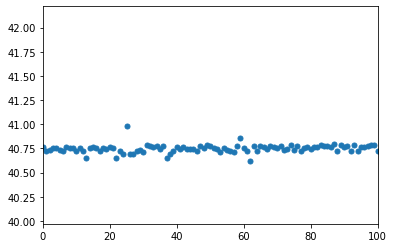

In [58]:
plot(data['Lat'],'.',ms=10)
xlim(0,100)

(40.3, 41)

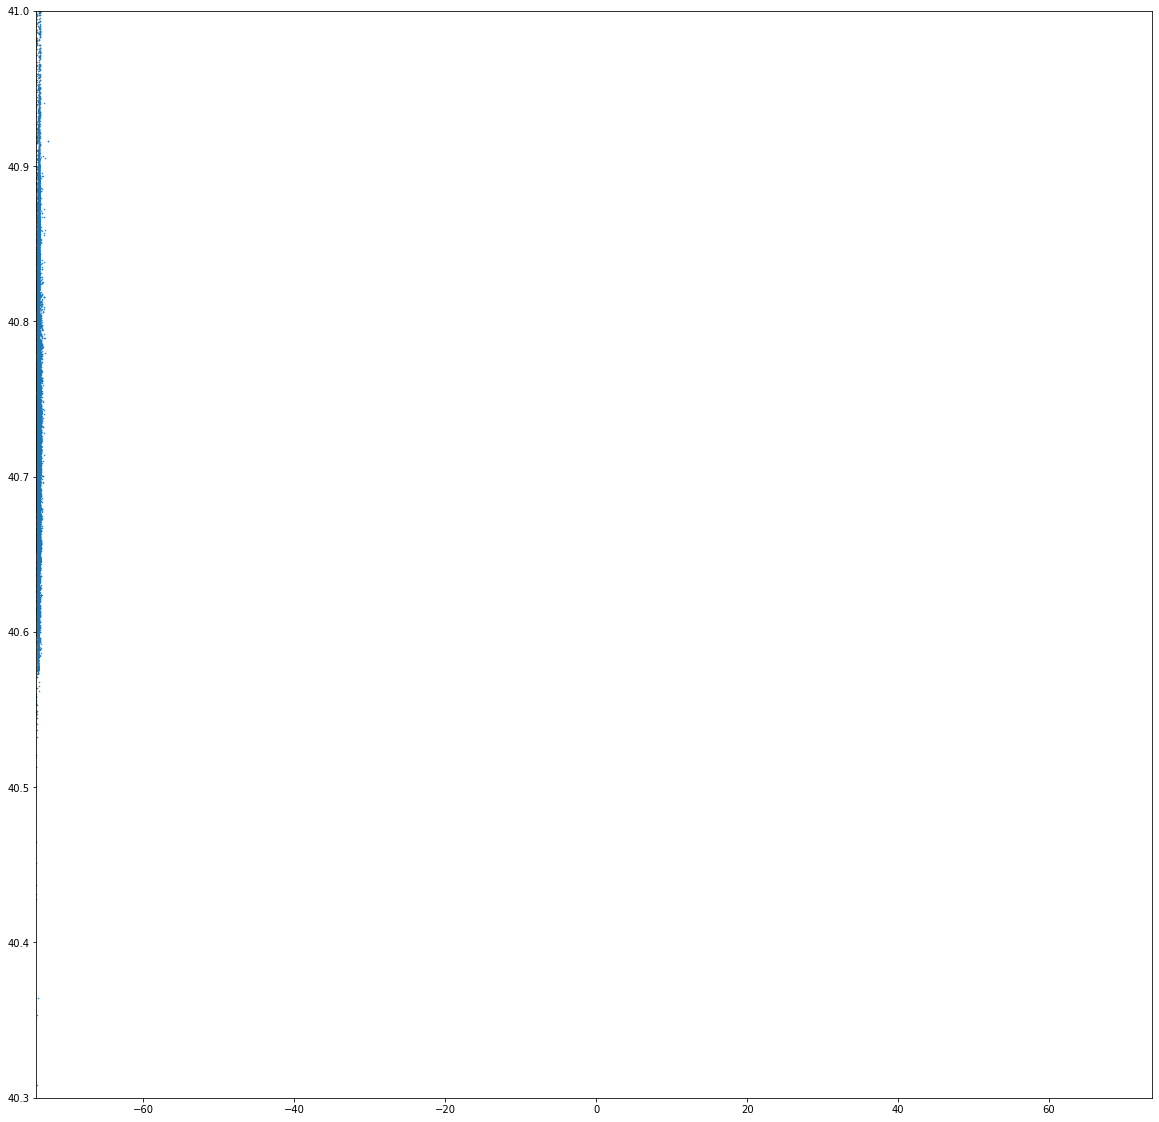

In [67]:
figure (figsize=(20,20) )
plot(data['Lon'],data['Lat'],'.',ms=1)
xlim(-74.2,73.7)
ylim(40.3,41)